<a href="https://colab.research.google.com/github/MariiaSam/data_science/blob/main/%D1%82%D0%B5%D0%BC%D0%B8_8_%D1%96_9_SVM_K_means_%D0%A3%D1%80%D0%BE%D0%BA_1%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Завдання. Потрібно побудувати моделі SVM, Random Forest та інші. Вибрати найкращу. Зробити висновки.
 Визначити оптимальну кількість кластерів методом ліктя та методом силуєтів. Візалізувати кластери методои середніх або будь-яким зручним методом.

Файл  із даними завантажити з Kaggle за посиланням.
https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
file_path = '/content/drive/My Drive/Student_data.csv'
df = pd.read_csv(file_path)

# Виведення перших кількох рядків
df.head()


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [ ]:
#Перевірка наявності файлу в папці (не могла зчитати)
#import os
#os.listdir('/content/drive/My Drive')

In [3]:
print("Назви стовпців:")
df.columns

Назви стовпців:


Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [5]:
# Перевірка наявності дублікатів
print("\nПеревірка наявності дублікатів:")
df.duplicated().sum()


Перевірка наявності дублікатів:


0

In [6]:
df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [7]:
# Відокремлення ознак та цільової змінної
X = df.drop(['StudentID', 'GradeClass'], axis=1)
y = df['GradeClass']

# Розділення даних на навчальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Збереження індексів тестової вибірки перед масштабуванням
test_indices = X_test.index

# Масштабування даних
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [8]:
# Побудова моделі SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("SVM Model Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


SVM Model Accuracy: 0.8225469728601252
SVM Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        22
         1.0       0.58      0.80      0.67        49
         2.0       0.80      0.71      0.75        85
         3.0       0.76      0.79      0.77        86
         4.0       0.92      0.96      0.94       237

    accuracy                           0.82       479
   macro avg       0.61      0.65      0.63       479
weighted avg       0.79      0.82      0.80       479

SVM Confusion Matrix:
 [[  0  15   3   2   2]
 [  0  39   5   1   4]
 [  0  10  60  10   5]
 [  0   2   7  68   9]
 [  0   1   0   9 227]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [10]:
# Побудова моделі Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Model Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Model Accuracy: 0.9102296450939458
Random Forest Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.41      0.55        22
         1.0       0.80      0.88      0.83        49
         2.0       0.94      0.87      0.90        85
         3.0       0.89      0.90      0.89        86
         4.0       0.94      0.98      0.96       237

    accuracy                           0.91       479
   macro avg       0.88      0.81      0.83       479
weighted avg       0.91      0.91      0.91       479

Random Forest Confusion Matrix:
 [[  9   6   3   2   2]
 [  1  43   0   1   4]
 [  1   2  74   4   4]
 [  0   2   2  77   5]
 [  0   1   0   3 233]]


Спробуємо підвищити точність моделі. Застосуємо логістичну регресію.

In [11]:
from sklearn.linear_model import LogisticRegression

# Створення та навчання моделі
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train, y_train)

# Прогнозування
y_pred_log_reg = log_reg_model.predict(X_test)

# Оцінка моделі
print("Logistic Regression Model Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log_reg))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))

Logistic Regression Model Accuracy: 0.7453027139874739
Logistic Regression Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        22
         1.0       0.43      0.47      0.45        49
         2.0       0.60      0.62      0.61        85
         3.0       0.71      0.57      0.63        86
         4.0       0.88      0.98      0.93       237

    accuracy                           0.75       479
   macro avg       0.53      0.53      0.52       479
weighted avg       0.71      0.75      0.73       479

Logistic Regression Confusion Matrix:
 [[  0  15   3   2   2]
 [  4  23  17   1   4]
 [  1  12  53  14   5]
 [  0   2  14  49  21]
 [  0   1   1   3 232]]


Спробуємо застосувати градієнтний бустінг

In [12]:
from sklearn.ensemble import GradientBoostingClassifier

# Створення та навчання моделі
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Прогнозування
y_pred_gb = gb_model.predict(X_test)

# Оцінка моделі
print("Gradient Boosting Model Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Gradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gb))
print("Gradient Boosting Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))

Gradient Boosting Model Accuracy: 0.9039665970772442
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.59      0.70        22
         1.0       0.77      0.88      0.82        49
         2.0       0.94      0.86      0.90        85
         3.0       0.89      0.86      0.88        86
         4.0       0.93      0.97      0.95       237

    accuracy                           0.90       479
   macro avg       0.88      0.83      0.85       479
weighted avg       0.91      0.90      0.90       479

Gradient Boosting Confusion Matrix:
 [[ 13   2   3   2   2]
 [  1  43   0   1   4]
 [  1   3  73   4   4]
 [  0   3   2  74   7]
 [  0   5   0   2 230]]


Спробуємо відібрати ознаки і побудувати моделі.

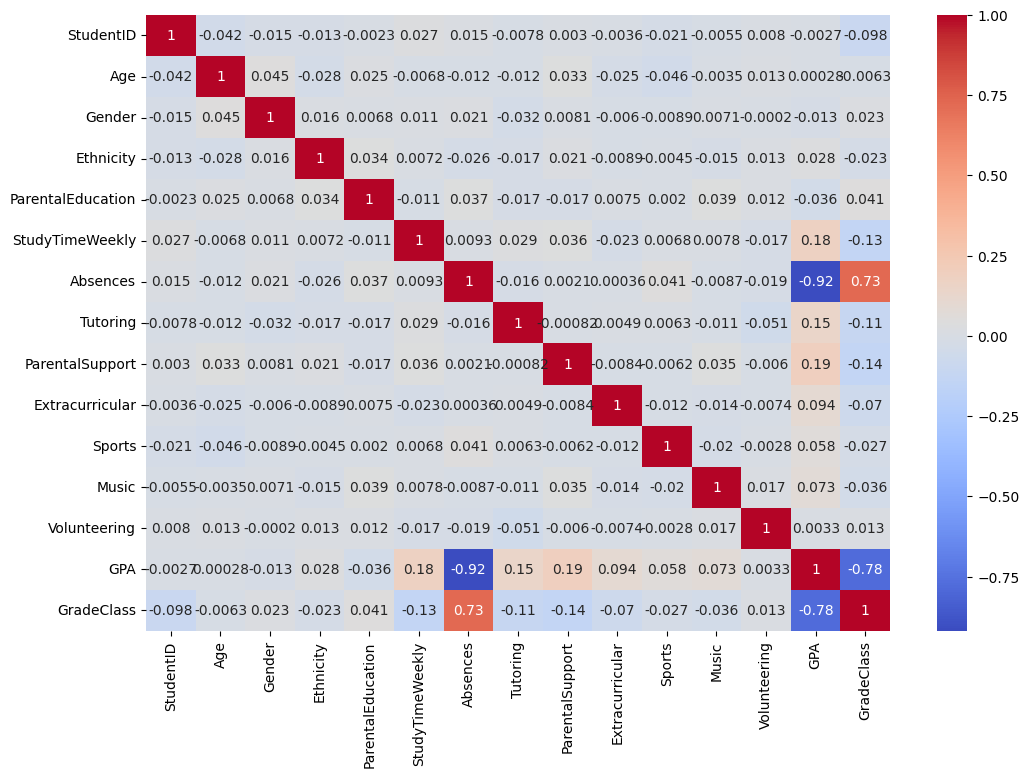

GradeClass           1.000000
GPA                  0.782835
Absences             0.728633
ParentalSupport      0.136823
StudyTimeWeekly      0.134131
Tutoring             0.111695
StudentID            0.098500
Extracurricular      0.069733
ParentalEducation    0.041031
Music                0.036065
Sports               0.026654
Ethnicity            0.023326
Gender               0.022998
Volunteering         0.013156
Age                  0.006250
Name: GradeClass, dtype: float64


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Кореляційна матриця
corr_matrix = df.corr()

# Візуалізація кореляційної матриці
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Вибір ознак, що мають високий кореляційний зв'язок з цільовою змінною
target_corr = corr_matrix['GradeClass'].abs().sort_values(ascending=False)
print(target_corr)

На основі кореляційного аналізу, ми оберемо ознаки, які мають найвищий кореляційний зв'язок з цільовою змінною GradeClass. Обираємо топ-5 ознак:

1. GPA
2. Absences
3. ParentalSupport
4. StudyTimeWeekly
5. Tutoring

In [28]:
# Обрані ознаки
selected_features = ['GPA', 'Absences', 'ParentalSupport', 'StudyTimeWeekly', 'Tutoring']

# Відокремлення ознак та цільової змінної
X = df[selected_features]
y = df['GradeClass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [29]:
# Модель SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("SVM Model Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Model Accuracy: 0.8622129436325678
SVM Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        22
         1.0       0.64      0.90      0.75        49
         2.0       0.92      0.80      0.86        85
         3.0       0.83      0.83      0.83        86
         4.0       0.92      0.97      0.94       237

    accuracy                           0.86       479
   macro avg       0.66      0.70      0.67       479
weighted avg       0.83      0.86      0.84       479



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [30]:
# Модель Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Model Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Model Accuracy: 0.9164926931106472
Random Forest Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.64      0.74        22
         1.0       0.86      0.86      0.86        49
         2.0       0.94      0.86      0.90        85
         3.0       0.89      0.88      0.89        86
         4.0       0.93      0.99      0.96       237

    accuracy                           0.92       479
   macro avg       0.90      0.84      0.87       479
weighted avg       0.92      0.92      0.91       479



In [31]:
# Логістична регресія
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train, y_train)
y_pred_log_reg = log_reg_model.predict(X_test)

print("Logistic Regression Model Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log_reg))

Logistic Regression Model Accuracy: 0.7807933194154488
Logistic Regression Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        22
         1.0       0.52      0.67      0.58        49
         2.0       0.68      0.66      0.67        85
         3.0       0.76      0.59      0.67        86
         4.0       0.88      0.99      0.93       237

    accuracy                           0.78       479
   macro avg       0.57      0.58      0.57       479
weighted avg       0.75      0.78      0.76       479



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [32]:
# Модель Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

print("Gradient Boosting Model Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Gradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gb))

Gradient Boosting Model Accuracy: 0.9081419624217119
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

         0.0       0.78      0.64      0.70        22
         1.0       0.86      0.88      0.87        49
         2.0       0.91      0.87      0.89        85
         3.0       0.89      0.87      0.88        86
         4.0       0.93      0.97      0.95       237

    accuracy                           0.91       479
   macro avg       0.88      0.84      0.86       479
weighted avg       0.91      0.91      0.91       479



In [33]:
import numpy as np
random_indices = np.random.choice(len(X_test), size=10, replace=False)

# Отримання відповідних індексів із оригінального DataFrame за індексами тестової вибірки
selected_test_indices = test_indices[random_indices]  # Вибрані індекси

# Отримуємо відповідні StudentID, справжні та прогнозовані значення
student_ids = df.loc[selected_test_indices, 'StudentID']
true_values = y_test.iloc[random_indices]  # Справжні значення
predicted_values = y_pred_rf[random_indices]  # Прогнозовані значення

# Створюємо DataFrame для виведення результатів
df_results = pd.DataFrame({
    'StudentID': student_ids,
    'True_GradeClass': true_values,
    'Predicted_GradeClass': predicted_values
})

print(df_results)

      StudentID  True_GradeClass  Predicted_GradeClass
1833       2834              4.0                   4.0
1270       2271              4.0                   4.0
1382       2383              4.0                   4.0
808        1809              4.0                   4.0
2066       3067              4.0                   4.0
1807       2808              4.0                   4.0
2222       3223              2.0                   1.0
461        1462              3.0                   3.0
507        1508              4.0                   4.0
1067       2068              3.0                   3.0


Завдання 2. Задача кластеризації

In [53]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [35]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

def elbow_method(X):
    wcss = []  # Within-Cluster Sum of Square (інерція)
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)  # інерція

    # Графік метода ліктя
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, 11), wcss, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS (Inertia)')
    plt.show()



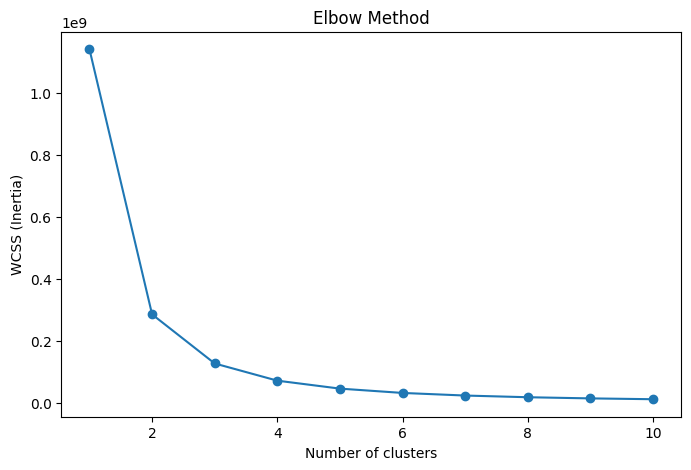

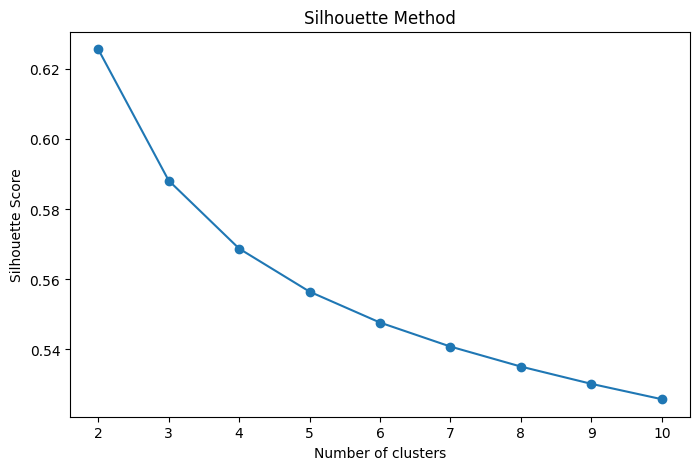

In [49]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

def silhouette_method(X):
    silhouette_scores = []
    for i in range(2, 11):  # Мінімум 2 кластери
        kmeans = KMeans(n_clusters=i, random_state=42)
        labels = kmeans.fit_predict(X)
        silhouette_scores.append(silhouette_score(X, labels))

    # Графік силуетного коефіцієнта
    plt.figure(figsize=(8, 5))
    plt.plot(range(2, 11), silhouette_scores, marker='o')
    plt.title('Silhouette Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.show()

# Викликаємо обидва методи для визначення кількості кластерів
elbow_method(df)
silhouette_method(df)

In [50]:
from sklearn.decomposition import PCA
#Використання PCA для зменшення розмірності
pca = PCA(n_components=2)  # Вибираємо 2 головні компоненти для прикладу
X_pca = pca.fit_transform(X)

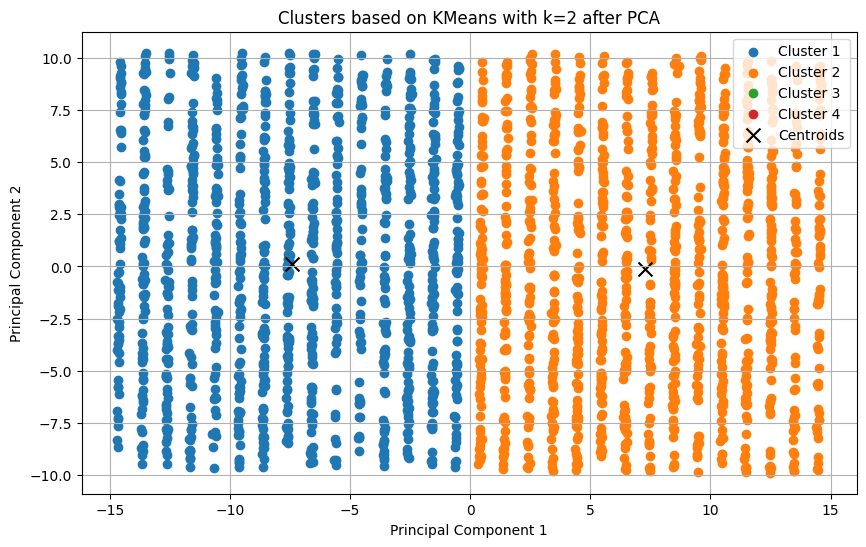

In [51]:
# Кластеризація з KMeans з k = 2 - загальна кількість класів
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_pca)

# Отримання міток кластерів та центроїдів
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Візуалізація кластерів
plt.figure(figsize=(10, 6))

# Відокремлення точок для кожного кластера та відображення їх на графіку
for i in range(4):
    plt.scatter(X_pca[cluster_labels == i, 0], X_pca[cluster_labels == i, 1], label=f'Cluster {i+1}')

# Відображення центроїдів
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='k', s=100, label='Centroids')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters based on KMeans with k=2 after PCA')
plt.legend()
plt.grid(True)
plt.show()